In [118]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
from itertools import product
import re
from copy import deepcopy
import random

In [119]:
def neighbor_edges_of_node(graph, node):
    neighbor_edges = []
    for edge in graph.edges():
        if node in edge:
            neighbor_edges.append(edge)
    return neighbor_edges

In [120]:
def is_valid_coloring(graph, coloring):
    edge_color = {edge: coloring[i] for i, edge in enumerate(graph.edges())}
    
    for edge in graph.edges():
        u, v = edge
        
        u_edges = neighbor_edges_of_node(graph, u)
        v_edges = neighbor_edges_of_node(graph, v)

        u_edges.remove(edge)
        v_edges.remove(edge)
        
        for i in range(len(u_edges)):
            if edge_color[u_edges[i]] == edge_color[edge]:
                return False
        
        for j in range(len(v_edges)):  
            if edge_color[v_edges[j]] == edge_color[edge]:
                return False
    return True

In [121]:
def initialize(graph):
    return [random.randrange(1, len(graph.edges())) for _ in range(len(graph.edges()))]

In [122]:
#broj grana koje su tacno obojene
def calculate_value(graph, coloring):
    edge_color = {edge: coloring[i] for i, edge in enumerate(graph.edges())}
    num = 0

    for edge in graph.edges():
        indicator = True

        u, v = edge
        
        u_edges = neighbor_edges_of_node(graph, u)
        v_edges = neighbor_edges_of_node(graph, v)

        u_edges.remove(edge)
        v_edges.remove(edge)
        
        for i in range(len(u_edges)):
            if edge_color[u_edges[i]] == edge_color[edge]:
                indicator = False
        
        for j in range(len(v_edges)):  
            if edge_color[v_edges[j]] == edge_color[edge]:
                indicator = False

        if indicator:
            num += 1
    
    return len(graph.edges()) - num

In [123]:
def make_small_change_colors(solution):
    max_num = max(solution)
    second_max = max(num for num in solution if num != max_num)

    new_solution = [second_max if num == max_num else num for num in solution]
    return new_solution

In [124]:
def make_small_change_shuffle(solution):
    new_solution = deepcopy(solution)
    random_idx = random.randrange(len(solution))
    random_idx_two = random.randrange(len(solution))

    tmp = new_solution[random_idx]
    new_solution[random_idx] = new_solution[random_idx_two]
    new_solution[random_idx_two] = tmp

    return new_solution

In [125]:
def simulated_annealing(graph, max_iter=100000, initial_temperature=100.0, cooling_rate=0.95):
    coloring_result = initialize(graph)
    value = calculate_value(graph, coloring_result)

    best_coloring = None
    best_value = float('inf')
    
    current_temperature = initial_temperature
    iter_found = 0

    for i in range(max_iter):
        
        if current_temperature < 0.1:
            break
        
        if is_valid_coloring(graph, coloring_result):
            # smanji broj boja
            new_coloring = make_small_change_colors(coloring_result)
            new_value = calculate_value(graph, new_coloring)
        else:
            #samo permutuj
            new_coloring = make_small_change_shuffle(coloring_result)
            new_value = calculate_value(graph, new_coloring)
            
        if is_valid_coloring(graph, new_coloring):
            if new_value < value:
                coloring_result = deepcopy(new_coloring)
                value = new_value 
                if new_value < best_value:
                    best_coloring = deepcopy(new_coloring)
                    best_value = new_value
                    iter_found = i
        else:
            delta = new_value - value
            if delta < 0 or random.random() < pow(2.71828, delta / current_temperature):
                coloring_result = deepcopy(new_coloring)
                value = new_value

        current_temperature *= cooling_rate

    return best_coloring, iter_found

In [126]:
def draw_colored_graph(graph, coloring):    
    nx.draw(graph, with_labels=True, edge_color=coloring)
    plt.show()

In [127]:
def read_graph_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split()[2:])  # extractiong num_nodes and num_edges
        edges = [tuple(map(int, line.split()[1:])) for line in lines[1:] if line.startswith('e')]
        graph = nx.Graph()
        graph.add_nodes_from(range(1, num_nodes + 1))
        graph.add_edges_from(edges)
        
        return graph

In [128]:
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    parts[1] = int(parts[1]) if len(parts) > 1 else 0
    return parts

In [129]:
def run_tests(directory):
    files = os.listdir(directory)
    sorted_files = sorted(files, key=numerical_sort)

    for file in sorted_files:
        if file.endswith('.txt'):
            filepath = os.path.join(directory, file)
            print(f"Running test {file}...")
            start_time = time.time()
            graph = read_graph_from_file(filepath)
            coloring_result, iter = simulated_annealing(graph, max_iter=1000, initial_temperature=100.0, cooling_rate=0.95)
            end_time = time.time()
            
            if(coloring_result):
                print("Minimum edge coloring found.")
                print(coloring_result)
                print("Number of colors:", max(coloring_result)) 
                print("Number of iterations:", iter)         
                draw_colored_graph(graph, coloring_result)
                plt.close()
            else:
                print("No solution exists.")
                
            print("Time taken:", end_time - start_time, "seconds")
            print()

Running test graph_3_edges.txt...
No solution exists.
Time taken: 0.022475719451904297 seconds

Running test graph_5_edges.txt...
Minimum edge coloring found.
[3, 2, 1, 2, 3]
Number of colors: 3
Number of iterations: 0


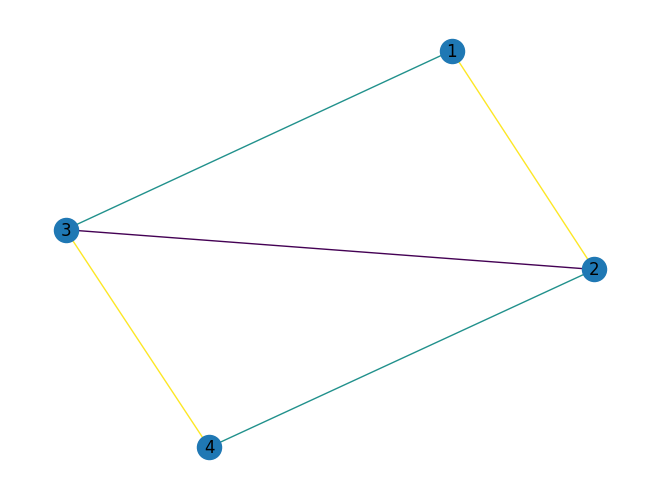

Time taken: 0.017735958099365234 seconds

Running test graph_5_edges_2.txt...
Minimum edge coloring found.
[3, 4, 1, 1, 2]
Number of colors: 4
Number of iterations: 3


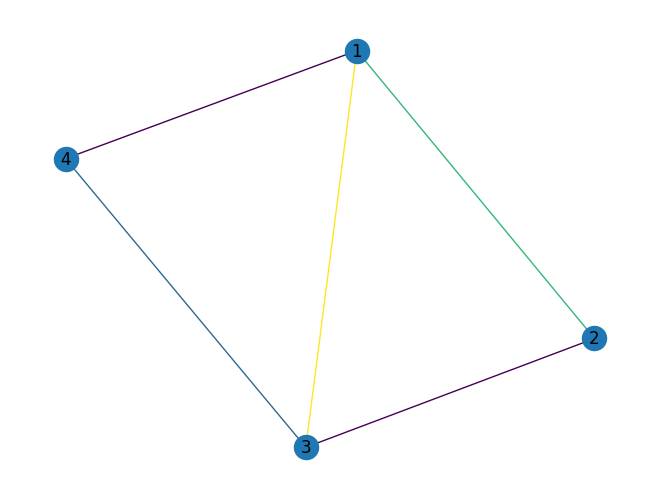

Time taken: 0.01625823974609375 seconds

Running test graph_6_edges.txt...
Minimum edge coloring found.
[4, 1, 5, 1, 5, 4]
Number of colors: 5
Number of iterations: 12


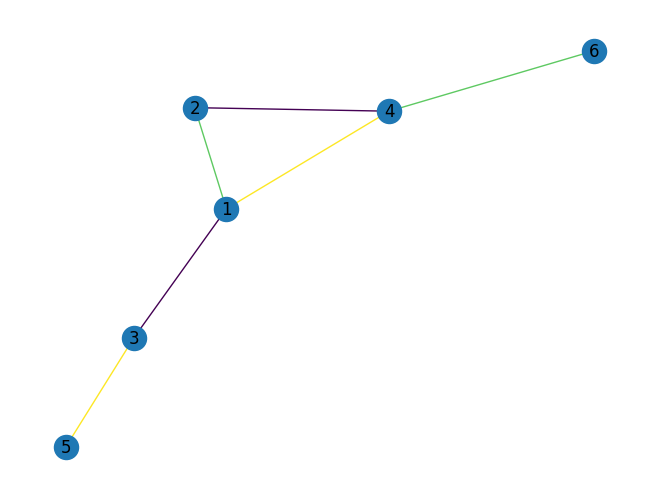

Time taken: 0.015630722045898438 seconds

Running test graph_7_edges.txt...
No solution exists.
Time taken: 0.019692182540893555 seconds

Running test graph_7_edges_2.txt...
Minimum edge coloring found.
[3, 4, 2, 2, 1, 1, 4]
Number of colors: 4
Number of iterations: 8


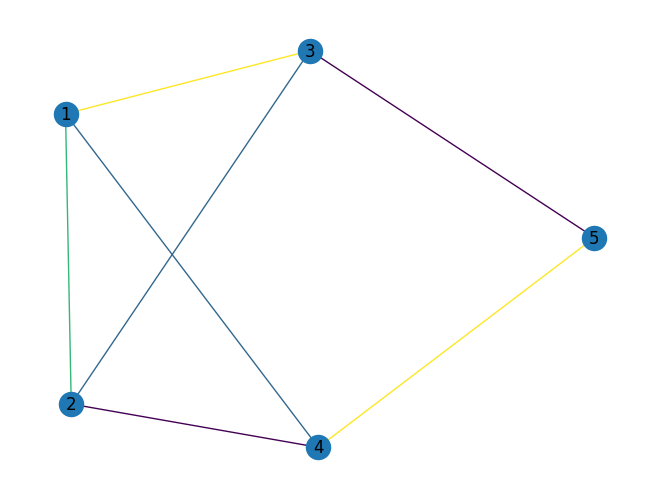

Time taken: 0.013478517532348633 seconds

Running test graph_7_edges_3.txt...
Minimum edge coloring found.
[2, 6, 4, 3, 2, 6, 6]
Number of colors: 6
Number of iterations: 15


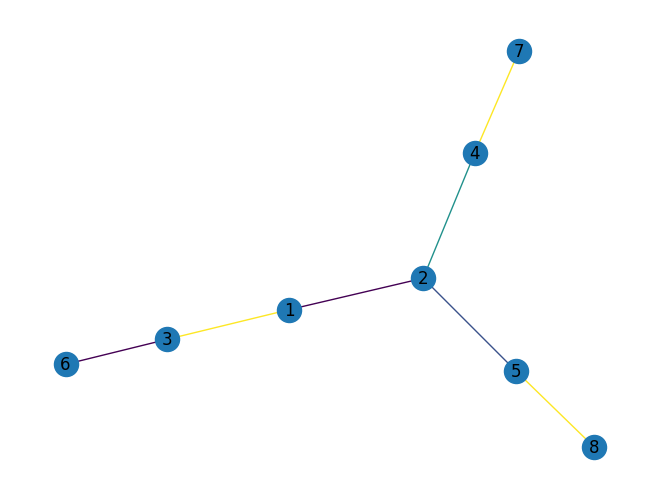

Time taken: 0.025586605072021484 seconds

Running test graph_8_edges.txt...
Minimum edge coloring found.
[3, 6, 7, 5, 3, 4, 7, 3]
Number of colors: 7
Number of iterations: 1


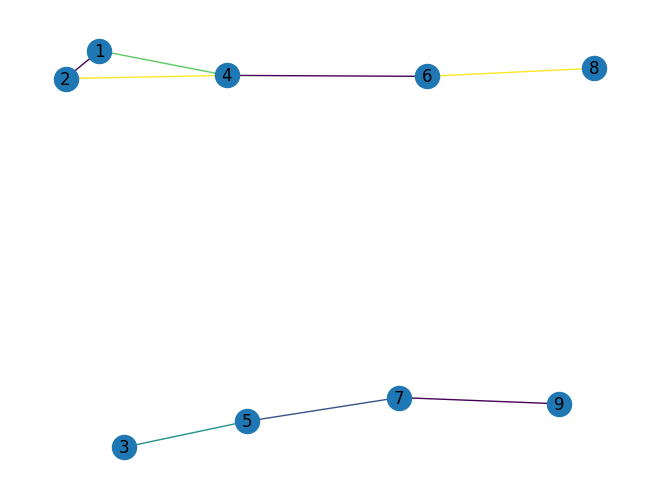

Time taken: 0.03125643730163574 seconds

Running test graph_9_edges.txt...
Minimum edge coloring found.
[1, 8, 4, 8, 6, 4, 1, 7, 2]
Number of colors: 8
Number of iterations: 5


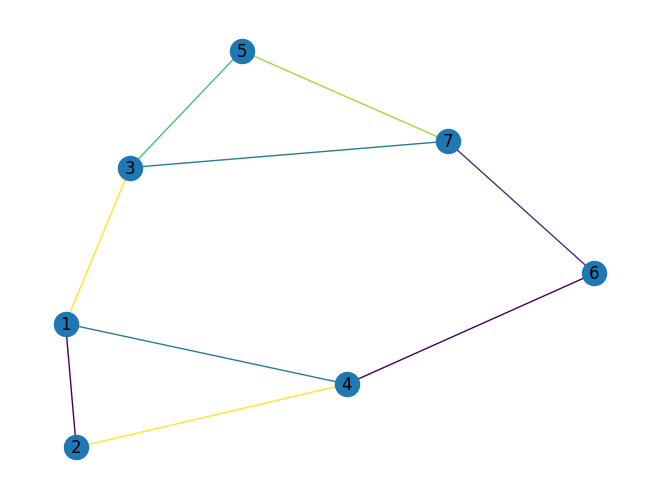

Time taken: 0.05091738700866699 seconds

Running test graph_9_edges_2.txt...
Minimum edge coloring found.
[5, 6, 2, 1, 2, 1, 6, 8, 2]
Number of colors: 8
Number of iterations: 5


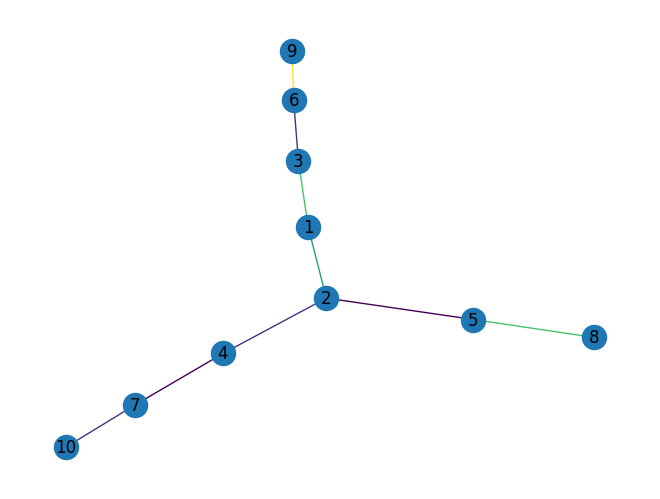

Time taken: 0.07049727439880371 seconds

Running test graph_10_edges.txt...
Minimum edge coloring found.
[7, 3, 2, 3, 7, 6, 2, 5, 2, 7]
Number of colors: 7
Number of iterations: 5


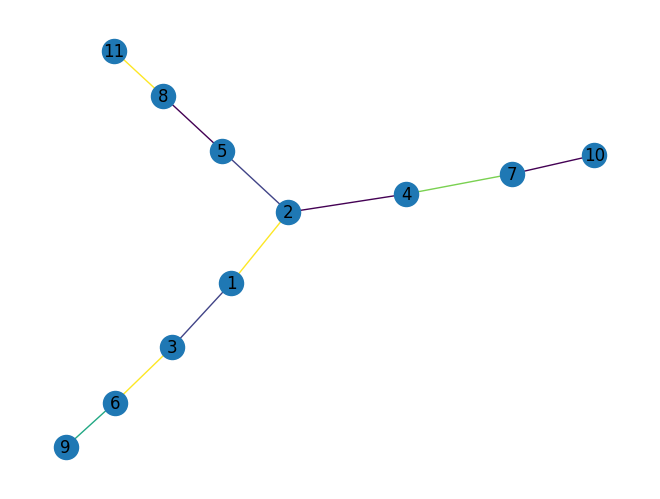

Time taken: 0.07084178924560547 seconds

Running test graph_10_edges_2.txt...
No solution exists.
Time taken: 0.03847479820251465 seconds

Running test graph_10_edges_3.txt...
Minimum edge coloring found.
[4, 7, 9, 2, 1, 5, 5, 1, 7, 2]
Number of colors: 9
Number of iterations: 8


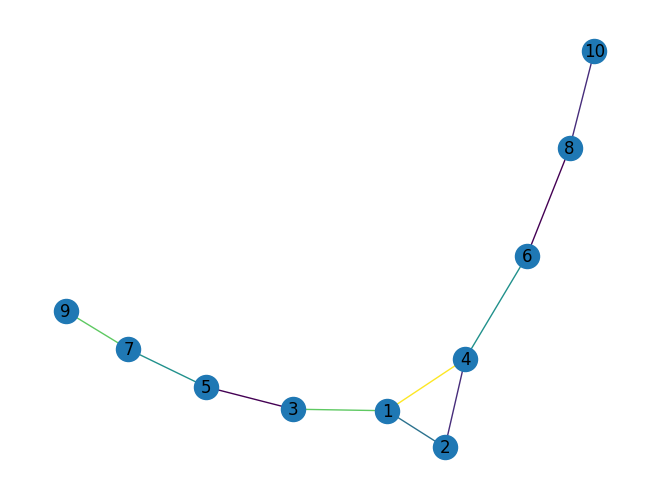

Time taken: 0.028124570846557617 seconds

Running test graph_11_edges.txt...
No solution exists.
Time taken: 0.055614471435546875 seconds

Running test graph_11_edges_2s.txt...
Minimum edge coloring found.
[8, 7, 2, 7, 2, 3, 3, 4, 3, 9, 8]
Number of colors: 9
Number of iterations: 66


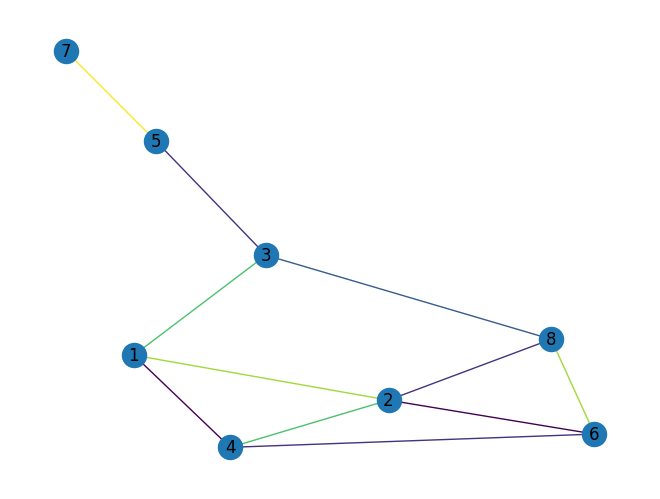

Time taken: 0.054459571838378906 seconds

Running test graph_11_edges_3.txt...
Minimum edge coloring found.
[9, 7, 6, 2, 2, 4, 7, 2, 2, 8, 3]
Number of colors: 9
Number of iterations: 8


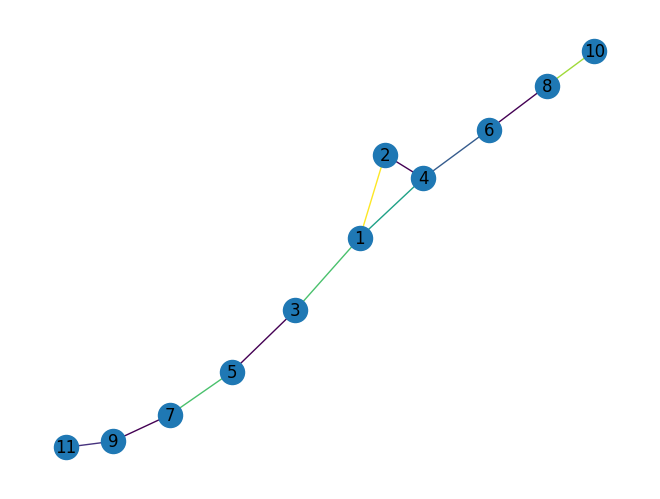

Time taken: 0.07913613319396973 seconds

Running test graph_11_edges_4.txt...
Minimum edge coloring found.
[5, 2, 2, 4, 4, 4, 6, 1, 7, 4, 2]
Number of colors: 7
Number of iterations: 50


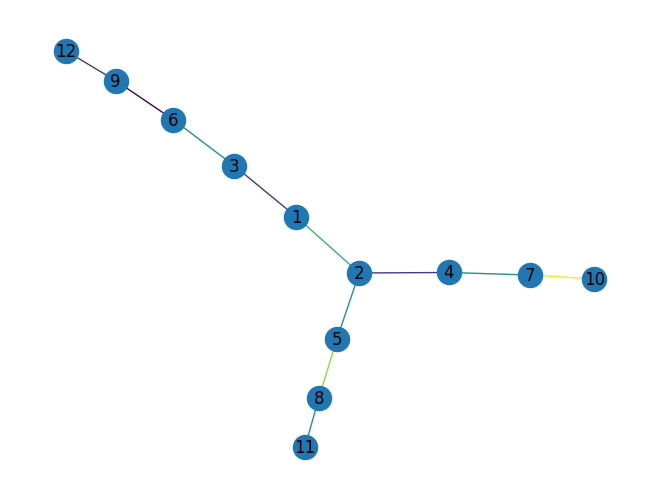

Time taken: 0.06954526901245117 seconds

Running test graph_12_edges.txt...
Minimum edge coloring found.
[8, 2, 3, 2, 6, 4, 2, 9, 7, 2, 2, 1]
Number of colors: 9
Number of iterations: 43


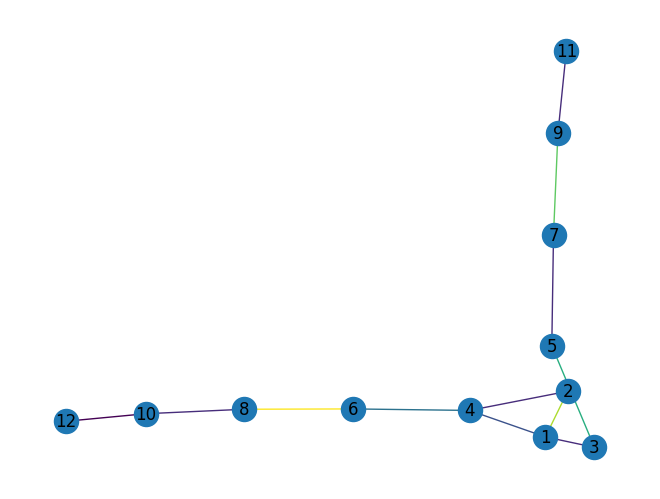

Time taken: 0.08461666107177734 seconds

Running test graph_12_edges_2.txt...
Minimum edge coloring found.
[5, 4, 11, 3, 11, 3, 6, 7, 1, 7, 4, 2]
Number of colors: 11
Number of iterations: 18


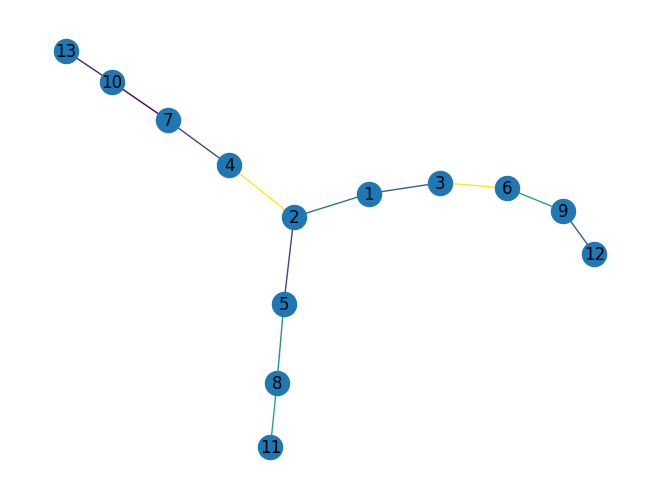

Time taken: 0.06653094291687012 seconds

Running test graph_15_edges.txt...
Minimum edge coloring found.
[7, 13, 9, 5, 8, 10, 1, 4, 10, 11, 2, 7, 14, 11, 8]
Number of colors: 14
Number of iterations: 15


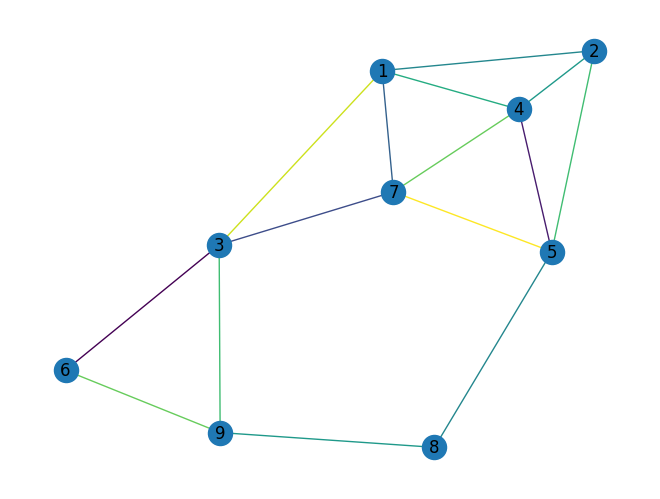

Time taken: 0.1077125072479248 seconds



In [130]:
run_tests('./tests')